<a href="https://colab.research.google.com/github/christophersingh/Master/blob/main/Master_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv?raw=true', names=['pregnant','glucose','bloodPressure','diabetes','thickness','insulin','BMI','age','target'])
df

,pregnant,glucose,bloodPressure,diabetes,thickness,insulin,BMI,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [73]:
df.describe()

,pregnant,glucose,bloodPressure,diabetes,thickness,insulin,BMI,age,target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [74]:
df.isna().sum()

pregnant         0
glucose          0
bloodPressure    0
diabetes         0
thickness        0
insulin          0
BMI              0
age              0
target           0
dtype: int64

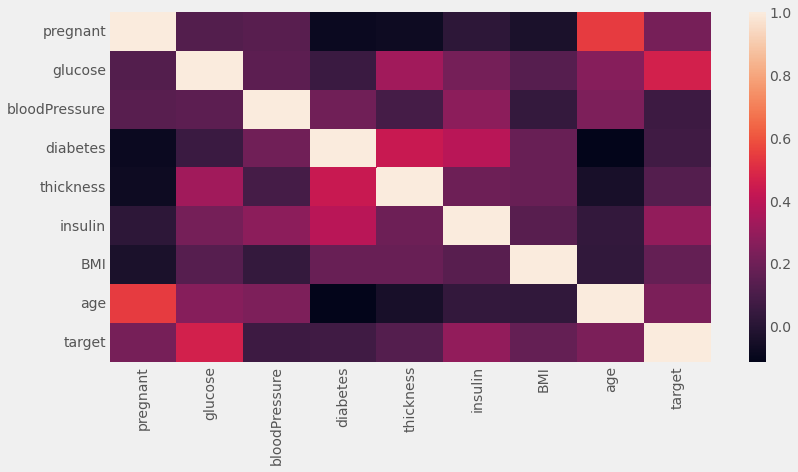

In [75]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr)
pass;

Box Plot

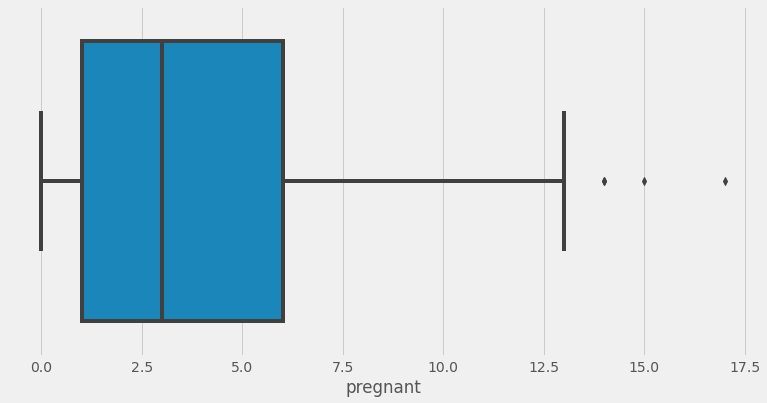

In [76]:
sns.boxplot(df['pregnant'])
pass;

In [77]:
(np.where(df['pregnant']>13))

(array([ 88, 159, 298, 455]),)

Z-score Normalization

99% of data is within 3 standard deviations away from the mean

In [78]:
from scipy import stats
import numpy as np

outliers = []

def check_outlier(row):
  z = np.abs(stats.zscore(row))
  threshold = 3
  outliers.append((np.where(z > 3)))
  return list((np.where(z > 3)))

res = df.apply(check_outlier) 
z = np.abs(stats.zscore(df['pregnant']))
y = np.abs(stats.zscore(df['glucose']))
res.drop(['target'], inplace = True, axis = 1)
res

,pregnant,glucose,bloodPressure,diabetes,thickness,insulin,BMI,age
0,"[88, 159, 298, 455]","[75, 182, 342, 349, 502]","[7, 15, 49, 60, 78, 81, 172, 193, 222, 261, 26...",[579],"[8, 13, 111, 153, 186, 220, 228, 247, 286, 370...","[9, 49, 60, 81, 145, 177, 371, 426, 445, 494, ...","[4, 45, 58, 228, 330, 370, 371, 395, 445, 593,...","[123, 453, 459, 666, 684]"


In [79]:
helper = []
for x in outliers:
  np.asarray(x)
  helper.append(x[0])

helper

[array([ 88, 159, 298, 455]),
 array([ 75, 182, 342, 349, 502]),
 array([  7,  15,  49,  60,  78,  81, 172, 193, 222, 261, 266, 269, 300,
        332, 336, 347, 357, 426, 430, 435, 453, 468, 484, 494, 522, 533,
        535, 589, 601, 604, 619, 643, 697, 703, 706]),
 array([579]),
 array([  8,  13, 111, 153, 186, 220, 228, 247, 286, 370, 409, 415, 486,
        584, 645, 655, 695, 753]),
 array([  9,  49,  60,  81, 145, 177, 371, 426, 445, 494, 522, 673, 684,
        706]),
 array([  4,  45,  58, 228, 330, 370, 371, 395, 445, 593, 621]),
 array([123, 453, 459, 666, 684]),
 array([], dtype=int64)]

In [80]:
result = []
seen = set()
for innerlist in helper:
  for item in innerlist:
    if not item in seen:
      seen.add(item)
      result.append(item)

In [81]:
len(result)

80

In [82]:
rows = df.index[result]

df.drop(rows, inplace=True)
df_cluster = df
df

,pregnant,glucose,bloodPressure,diabetes,thickness,insulin,BMI,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [83]:
df["target"].value_counts()

0    461
1    227
Name: target, dtype: int64

In [84]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomOverSampler(random_state=42)

# fit predictor and target variable

X, Y = ros.fit_resample(df.iloc[:, 0:8], df['target'])
X.shape, Y.shape

((922, 8), (922,))

In [85]:
Y.value_counts()

1    461
0    461
Name: target, dtype: int64

In [86]:
from sklearn import preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(X)
X = pd.DataFrame(x_scaled)
X

,0,1,2,3,4,5,6,7
0,0.545681,0.696653,-0.104756,0.883126,-0.802151,0.120664,0.505728,1.360061
1,-0.959759,-1.297817,-0.579765,0.502046,-0.802151,-0.953196,-0.418576,-0.301066
2,1.147857,1.804692,-0.738102,-1.339845,-0.802151,-1.459444,0.656430,-0.213639
3,-0.959759,-1.171184,-0.579765,0.120965,0.179920,-0.723083,-1.034778,-1.175344
4,0.244593,-0.316411,0.053580,-1.339845,-0.802151,-1.106605,-0.920915,-0.388494
...,...,...,...,...,...,...,...,...
917,1.750033,0.095146,-0.896438,0.946640,-0.802151,1.286569,-0.117172,0.310928
918,0.244593,1.013236,0.845262,1.264207,1.391838,1.010433,-0.271223,-0.475922
919,-0.056495,0.633337,0.370253,-1.339845,-0.802151,0.872366,0.147393,2.846333
920,-0.357583,0.063488,-0.104756,0.247992,1.182886,-0.063427,0.244512,-0.650777


In [87]:
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import chi2_contingency
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
warnings.filterwarnings("ignore")

outcome = []
model_names = []
models = [('LogReg', LogisticRegression()),
          ('DecTree', DecisionTreeClassifier()),
          ('KNN\t', KNeighborsClassifier()),
          ('LinDisc', LinearDiscriminantAnalysis()),
          ('GaussianNB', GaussianNB()),
          ('RanForest', RandomForestClassifier()),
          ('XGB\t', XGBClassifier())
          ]

In [88]:
for model_name, model in models:
    k_fold_validation = model_selection.StratifiedKFold(n_splits=10)
    results = model_selection.cross_validate(model, X, Y, cv=k_fold_validation, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'roc_auc'])
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| \t Accuracy=%f Precision=%f Recall=%f F1=%f AUC=%f" % (model_name, results['test_accuracy'].mean(), results['test_precision_macro'].mean(), results['test_recall_macro'].mean(), results['test_f1_macro'].mean(), results['test_roc_auc'].mean())
    print(output_message)

LogReg| 	 Accuracy=0.760402 Precision=0.762206 Recall=0.760315 F1=0.759899 AUC=0.846981
DecTree| 	 Accuracy=0.842835 Precision=0.853950 Recall=0.842761 F1=0.841840 AUC=0.842761
KNN	| 	 Accuracy=0.769016 Precision=0.772519 Recall=0.768941 F1=0.768278 AUC=0.834070
LinDisc| 	 Accuracy=0.762576 Precision=0.765679 Recall=0.762465 F1=0.761757 AUC=0.847969
GaussianNB| 	 Accuracy=0.741959 Precision=0.743969 Recall=0.741883 F1=0.741342 AUC=0.826720
RanForest| 	 Accuracy=0.874310 Precision=0.880495 Recall=0.874237 F1=0.873836 AUC=0.953736
XGB	| 	 Accuracy=0.816784 Precision=0.820191 Recall=0.816698 F1=0.816252 AUC=0.889391


In [89]:
accuracy, precision, recall, f1, auc = [], [], [], [], []
for x in range(0,7):
  accuracy.append(outcome[x]['test_accuracy'])
  precision.append(outcome[x]['test_precision_macro'])
  recall.append(outcome[x]['test_recall_macro'])
  f1.append(outcome[x]['test_f1_macro'])
  auc.append(outcome[x]['test_roc_auc'])

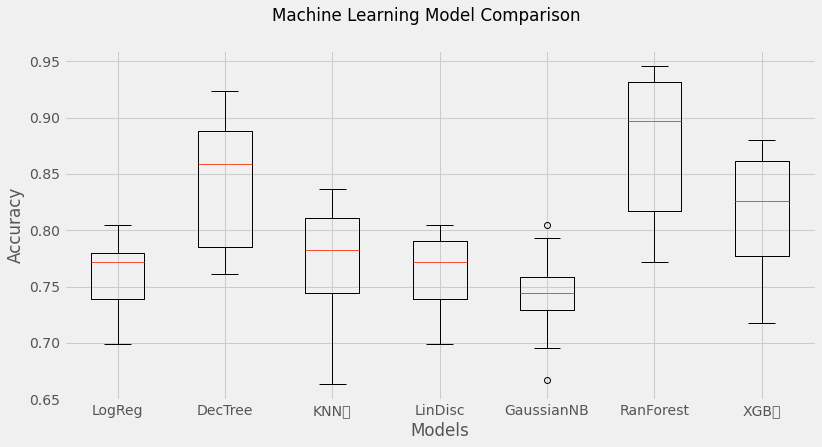

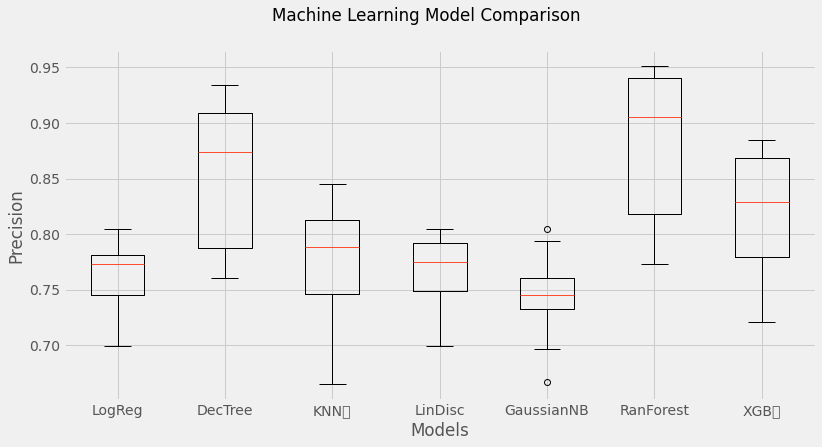

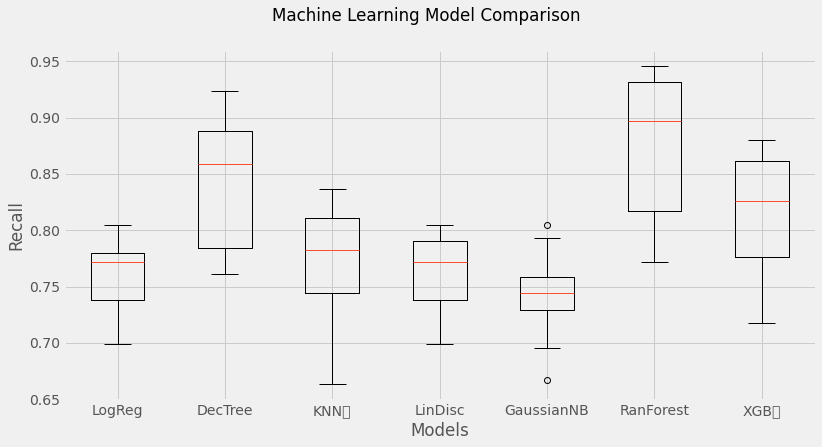

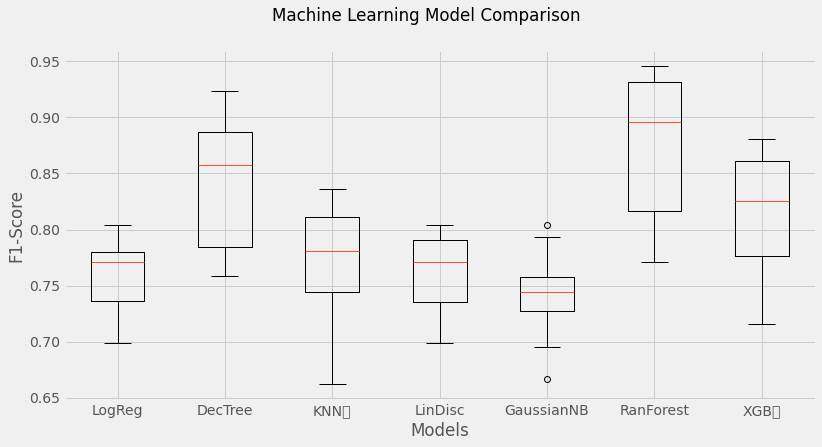

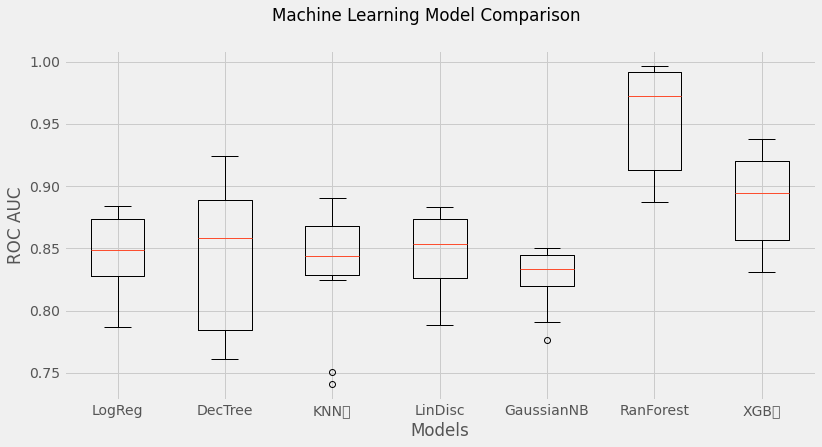

In [90]:
def plot_results(validation_metric, metric):
  fig = plt.figure(figsize=(12,6))
  fig.suptitle('Machine Learning Model Comparison')
  ax = fig.add_subplot(111)
  plt.boxplot(validation_metric)
  plt.xlabel('Models')
  plt.ylabel(metric)
  ax.set_xticklabels(model_names)
  plt.show()

plot_results(accuracy, "Accuracy")
plot_results(precision, "Precision")
plot_results(recall, "Recall")
plot_results(f1, "F1-Score")
plot_results(auc, "ROC AUC")

In [91]:
!pip install -q tensorflow

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42)

In [93]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((645, 8), (277, 8), (645,), (277,))

In [94]:
F_statistic, p_values = f_classif(X_train, Y_train)
# convert to a DF
ANOVA_F_table = pd.DataFrame(data = {'Numerical_Feature': X_train.columns.values, 'F-Score': F_statistic, 'p values': p_values.round(decimals=10)})
ANOVA_F_table.sort_values(by = ['F-Score'], ascending = False, ignore_index = True, inplace = True)
ANOVA_F_table[ANOVA_F_table['p values'] < 0.05]

,Numerical_Feature,F-Score,p values
0,1,216.520629,0.000000e+00
1,5,64.365180,0.000000e+00
2,7,47.126900,0.000000e+00
3,0,43.797261,1.000000e-10
4,2,32.948371,1.460000e-08
5,6,29.020056,1.006000e-07
6,4,11.559346,7.157946e-04


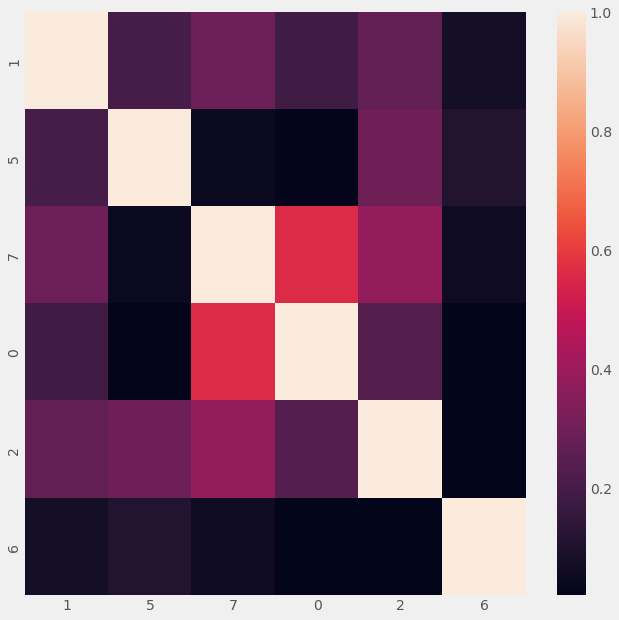

In [95]:
top_num_features = ANOVA_F_table.iloc[:6,0].to_list()
corrmat = X_train[top_num_features].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat);

In [96]:
drop_columns_list = ANOVA_F_table.iloc[6:, 0].to_list()

def col_to_drop(df, columns_list):
    df.drop(columns = columns_list, inplace = True)

# apply to X_train
col_to_drop(X_train, drop_columns_list)
col_to_drop(X_test, drop_columns_list)

In [97]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((645, 6), (277, 6), (645,), (277,))

In [98]:
for model_name, model in models:
    k_fold_validation = model_selection.StratifiedKFold(n_splits=10)
    results = model_selection.cross_validate(model, X_train, Y_train, cv=k_fold_validation, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'roc_auc'])
    outcome.append(results)
    model_names.append(model_name) 
    output_message = "%s| \t Accuracy=%f Precision=%f Recall=%f F1=%f AUC=%f" % (model_name, results['test_accuracy'].mean(), results['test_precision_macro'].mean(), results['test_recall_macro'].mean(), results['test_f1_macro'].mean(), results['test_roc_auc'].mean())
    print(output_message)

LogReg| 	 Accuracy=0.749014 Precision=0.751024 Recall=0.747384 F1=0.746903 AUC=0.836657
DecTree| 	 Accuracy=0.821611 Precision=0.825001 Recall=0.822718 F1=0.821356 AUC=0.822718
KNN	| 	 Accuracy=0.750288 Precision=0.752450 Recall=0.751109 F1=0.750007 AUC=0.819318
LinDisc| 	 Accuracy=0.750529 Precision=0.753373 Recall=0.748366 F1=0.747932 AUC=0.836059
GaussianNB| 	 Accuracy=0.735000 Precision=0.736724 Recall=0.733677 F1=0.733054 AUC=0.828066
RanForest| 	 Accuracy=0.848149 Precision=0.852650 Recall=0.849321 F1=0.847780 AUC=0.923072
XGB	| 	 Accuracy=0.804784 Precision=0.805735 Recall=0.804811 F1=0.804399 AUC=0.872051


In [99]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_custom_model(input_dim, output_dim, nodes, n=1, name='model'):
    def create_model():
        # Create model
        model = Sequential(name=name)
        for i in range(n):
            model.add(Dense(nodes, input_dim=input_dim, activation='relu'))
        model.add(Dense(output_dim, activation='sigmoid'))

        # Compile model
        model.compile(loss='binary_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])
        return model
    return create_model

models = [create_custom_model(6, 1, 6, i, 'model_{}'.format(i)) 
          for i in range(1, 5)]

for create_model in models:
    create_model().summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 6)                 42        
                                                                 
 dense_57 (Dense)            (None, 1)                 7         
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 6)                 42        
                                                                 
 dense_59 (Dense)            (None, 6)                 42        
                                                                 
 dense_60 (Dense)            (None, 1)        

In [100]:
from tensorflow.keras.callbacks import TensorBoard

history_dict = {}

# TensorBoard Callback
cb = TensorBoard()

for create_model in models:
    model = create_model()
    print('Model name:', model.name)
    history_callback = model.fit(X_train, Y_train,
                                 batch_size=26,
                                 epochs=25,
                                 verbose=0,
                                 validation_data=(X_test, Y_test),
                                 )
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    import numpy as np
    pred=model.predict(X_test)
    pred_digits=np.argmax(pred,axis=1)
    from sklearn.metrics import classification_report
    print(classification_report(Y_test, pred.round()))
    
    history_dict[model.name] = [history_callback, model]

Model name: model_1
Test loss: 0.49747562408447266
Test accuracy: 0.7220216393470764
              precision    recall  f1-score   support

           0       0.69      0.72      0.70       128
           1       0.75      0.72      0.74       149

    accuracy                           0.72       277
   macro avg       0.72      0.72      0.72       277
weighted avg       0.72      0.72      0.72       277

Model name: model_2
Test loss: 0.5107357501983643
Test accuracy: 0.7545126080513
              precision    recall  f1-score   support

           0       0.73      0.74      0.74       128
           1       0.78      0.77      0.77       149

    accuracy                           0.75       277
   macro avg       0.75      0.75      0.75       277
weighted avg       0.75      0.75      0.75       277

Model name: model_3
Test loss: 0.4666861593723297
Test accuracy: 0.7761732935905457
              precision    recall  f1-score   support

           0       0.78      0.72      0.

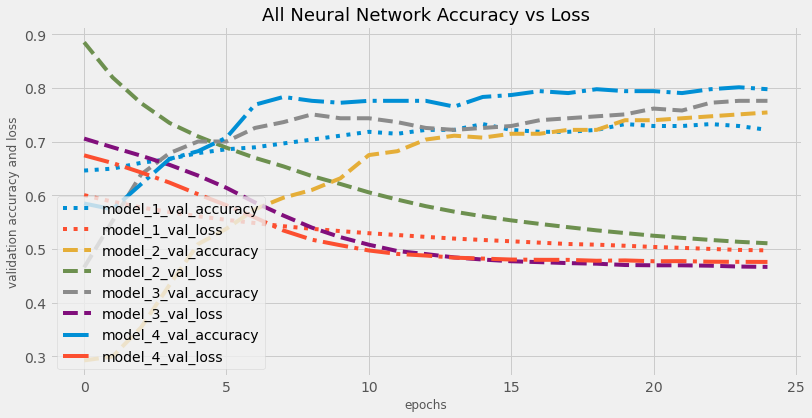

In [101]:
plt.rcParams["figure.figsize"] = (12,6)
for model_name in history_dict:
    val_acc = history_dict[model_name][0].history['val_accuracy']
    val_loss = history_dict[model_name][0].history['val_loss']
    if(model_name in "model_1"):
        plt.plot(val_acc, label=model_name, linestyle='dotted')
        plt.plot(val_loss, label=model_name, linestyle='dotted')
    if(model_name in "model_2"):
        plt.plot(val_acc, label=model_name, linestyle='dashed')
        plt.plot(val_loss, label=model_name, linestyle='dashed')
    if(model_name in "model_3"):
        plt.plot(val_acc, label=model_name, linestyle='dashed')
        plt.plot(val_loss, label=model_name, linestyle='dashed')
    if(model_name in "model_4"):
        plt.plot(val_acc, label=model_name, linestyle='dashdot')
        plt.plot(val_loss, label=model_name, linestyle='dashdot')

plt.title('All Neural Network Accuracy vs Loss' , fontsize=18)
plt.ylabel('validation accuracy and loss', fontsize=12)
plt.xlabel('epochs', fontsize=12)
plt.legend([ 'model_1_val_accuracy', 'model_1_val_loss', 'model_2_val_accuracy', 'model_2_val_loss',
            'model_3_val_accuracy', 'model_3_val_loss', 'model_4_val_accuracy', 'model_4_val_loss'],loc='best')
plt.show()

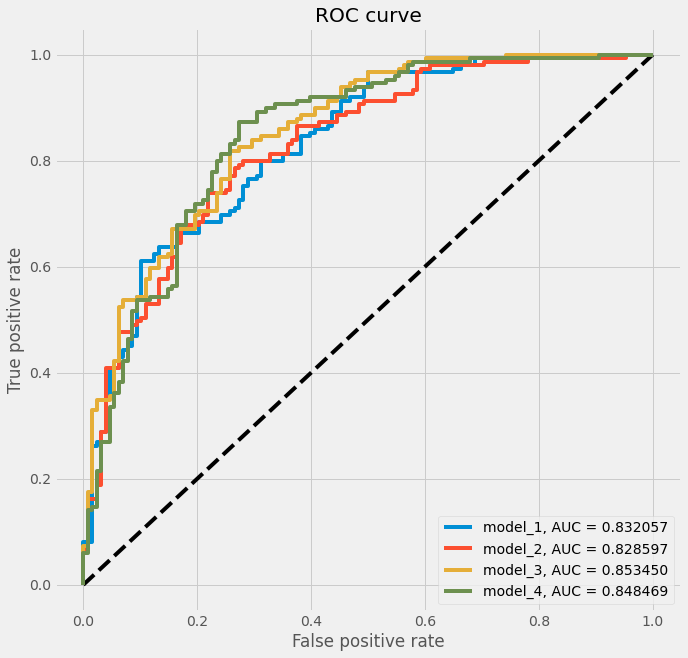

In [102]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')

for model_name in history_dict:
    model = history_dict[model_name][1]
    
    Y_pred = model.predict(X_test)
    fpr, tpr, threshold = roc_curve(Y_test.ravel(), Y_pred.ravel())
    
    plt.plot(fpr, tpr, label='{}, AUC = {:.6f}'.format(model_name, auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend();

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC


different_model_comparison = {
    "Random Forest":RandomForestClassifier(random_state=0,n_estimators=10),
    "Logistic Regression":LogisticRegression(random_state=0),
    "Decision Tree":DecisionTreeClassifier(random_state=0),
    "Support Vector Machines": SVC(probability=True), 
    "KNN": KNeighborsClassifier(),
    "Linear Discriminant": LinearDiscriminantAnalysis(),
    "Gaussian Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(),
    "Linear Support Vector": (SVC(kernel='linear',probability=True)),
}

def train_model(model_dict,X_train,y_train):
    for model in model_dict:
        model_dict[model].fit(X_train,y_train)
    return model_dict

from sklearn import metrics
def model_eval(clf_name,clf,X_test,y_test):
    y_pred = clf.predict(X_test)
    y_score = clf.predict_proba(X_test)[:,1]
    confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['True'], colnames= ['Predicted'], margins=False)
    report = pd.Series({
        "model":clf_name,
        "precision":metrics.precision_score(y_test, y_pred),
        "recall":metrics.recall_score(y_test, y_pred),
        "f1":metrics.f1_score(y_test, y_pred),
        'roc_auc_score' : metrics.roc_auc_score(y_test, y_score)
    })
    # draw ROC 
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score, drop_intermediate = False, pos_label = 1)
    auc_report = auc(fpr, tpr)
    plt.figure(1, figsize=(10,10))
    plt.suptitle('ROC AUC')
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.plot(fpr, tpr,label='{}, AUC = {:.6f}'.format(clf_name, auc_report))
    plt.plot([0,1],[0,1], 'k--', color = 'black')
    plt.legend()
    return report,confusion_matrix

def train_eval_model(model_dict,X_train,y_train,X_test,y_test):
    cols = ['model', 'roc_auc_score', 'precision', 'recall','f1']
    model_report = pd.DataFrame(columns = cols)
    cm_dict = {}
    model_dict = train_model(model_dict,X_train,y_train)
    for model in model_dict:
        report,confusion_matrix = model_eval(model,model_dict[model],X_test,y_test)
        model_report = model_report.append(report,ignore_index=True)
        cm_dict[model] = confusion_matrix
    return model_report,cm_dict

def plot_which_bar(df,col_name):
    df.set_index("model").loc[:,col_name].plot(kind='bar', stacked=True, sort_columns=True, figsize = (6,6))
    plt.title(col_name)
    plt.show()

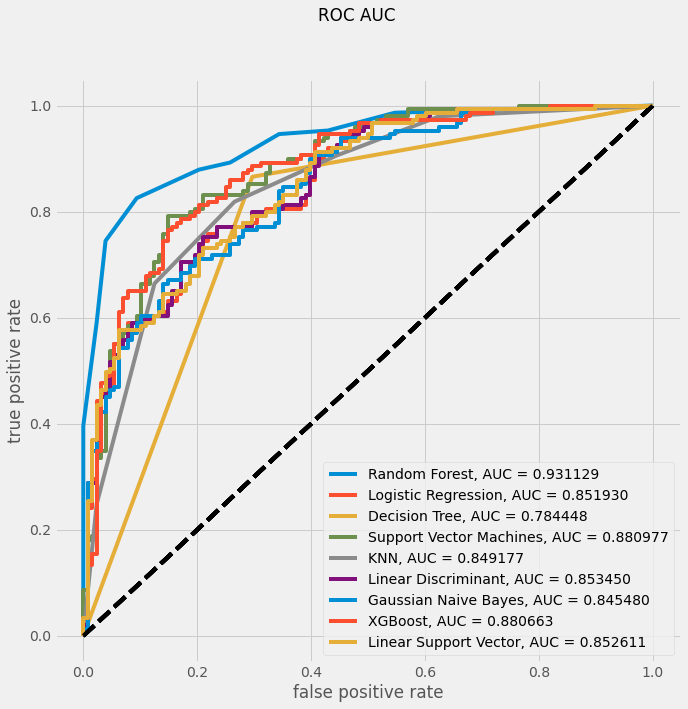

In [104]:
model_report, cm_dict = train_eval_model(different_model_comparison,X_train, Y_train, X_test, Y_test)

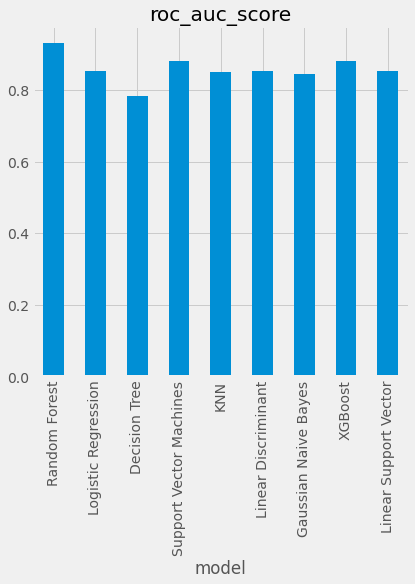

In [105]:
plot_which_bar(model_report,"roc_auc_score")

In [106]:
model_report

,model,roc_auc_score,precision,recall,f1
0,Random Forest,0.931129,0.834395,0.879195,0.856209
1,Logistic Regression,0.851930,0.804348,0.744966,0.773519
2,Decision Tree,0.784448,0.772455,0.865772,0.816456
3,Support Vector Machines,0.880977,0.815789,0.832215,0.823920
4,KNN,0.849177,0.782051,0.818792,0.800000
5,Linear Discriminant,0.853450,0.808824,0.738255,0.771930
6,Gaussian Naive Bayes,0.845480,0.769784,0.718121,0.743056
7,XGBoost,0.880663,0.798701,0.825503,0.811881
8,Linear Support Vector,0.852611,0.800000,0.724832,0.760563


In [107]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

random_grid

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [108]:
rf = RandomForestClassifier(random_state = 42)

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 10, scoring='roc_auc', 
                              cv = 10, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

rf_random.fit(X_train, Y_train);

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [109]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 2000}

In [110]:
def evaluate(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    y_score = clf.predict_proba(X_test)[:,1]
    confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['True'], colnames= ['Predicted'], margins=False)
    report = pd.Series({
        "model":clf,
        "precision":metrics.precision_score(y_test, y_pred),
        "recall":metrics.recall_score(y_test, y_pred),
        "f1":metrics.f1_score(y_test, y_pred),
        'roc_auc_score' : metrics.roc_auc_score(y_test, y_score)
    })
    
    return report

base_model = RandomForestClassifier(n_estimators = 2000, max_depth = 50, max_features='auto', min_samples_leaf=2, min_samples_split=2)
base_model.fit(X_train, Y_train)
base_accuracy = evaluate(base_model, X_test, Y_test)

best_random = rf_random.best_estimator_
random_accuracy =  evaluate(base_model, X_test, Y_test)

In [111]:
base_accuracy

model            (DecisionTreeClassifier(max_depth=50, max_feat...
precision                                                 0.829114
recall                                                    0.879195
f1                                                         0.85342
roc_auc_score                                             0.923658
dtype: object

In [112]:
random_accuracy

model            (DecisionTreeClassifier(max_depth=50, max_feat...
precision                                                 0.829114
recall                                                    0.879195
f1                                                         0.85342
roc_auc_score                                             0.923658
dtype: object

In [113]:
df.drop(['target'], axis=1, inplace=True)
df

,pregnant,glucose,bloodPressure,diabetes,thickness,insulin,BMI,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [114]:
from numpy import mean
from numpy import std
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df_cluster)
df = pd.DataFrame(np_scaled, columns = ['pregnant','glucose','bloodPressure','diabetes', 'thickness', 'insulin', 'BMI', 'age'])
df

,pregnant,glucose,bloodPressure,diabetes,thickness,insulin,BMI,age
0,0.461538,0.670968,0.489796,0.583333,0.000000,0.418478,0.396963,0.617021
1,0.076923,0.264516,0.428571,0.483333,0.000000,0.228261,0.197397,0.212766
2,0.615385,0.896774,0.408163,0.000000,0.000000,0.138587,0.429501,0.234043
3,0.076923,0.290323,0.428571,0.383333,0.226506,0.269022,0.064353,0.000000
4,0.384615,0.464516,0.510204,0.000000,0.000000,0.201087,0.088937,0.191489
...,...,...,...,...,...,...,...,...
683,0.769231,0.367742,0.530612,0.800000,0.433735,0.399457,0.067245,0.893617
684,0.153846,0.503226,0.469388,0.450000,0.000000,0.505435,0.189443,0.127660
685,0.384615,0.496774,0.489796,0.383333,0.269880,0.217391,0.120752,0.191489
686,0.076923,0.529032,0.367347,0.000000,0.000000,0.323370,0.195951,0.553191


In [115]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
principalDf

,PC1,PC2
0,1.255987,-0.330219
1,-1.830250,-0.175364
2,0.114417,-1.610778
3,-2.105069,0.383567
4,-1.032450,-1.734181
...,...,...
917,0.947863,0.004203
918,1.404043,1.827882
919,1.796801,-1.836095
920,-0.237989,1.150075


In [116]:
from sklearn.cluster import KMeans

def calculate_WSS(points, kmax):
    sse = []
    for k in range(1, kmax+1):
        kmeans = KMeans(n_clusters = k).fit(points)
        centroids = kmeans.cluster_centers_
        pred_clusters = kmeans.predict(points)
        curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
        curr_center = centroids[pred_clusters[i]]
        curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
    return sse

In [117]:
!pip install -q --trusted-host=pypi.org --trusted-host=files.pythonhosted.org --user opencv-python
!pip install -q --trusted-host=pypi.org --trusted-host=files.pythonhosted.org --user helper
!pip install -q kneed

In [118]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [119]:
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}

sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(principalDf)
    sse.append(kmeans.inertia_)

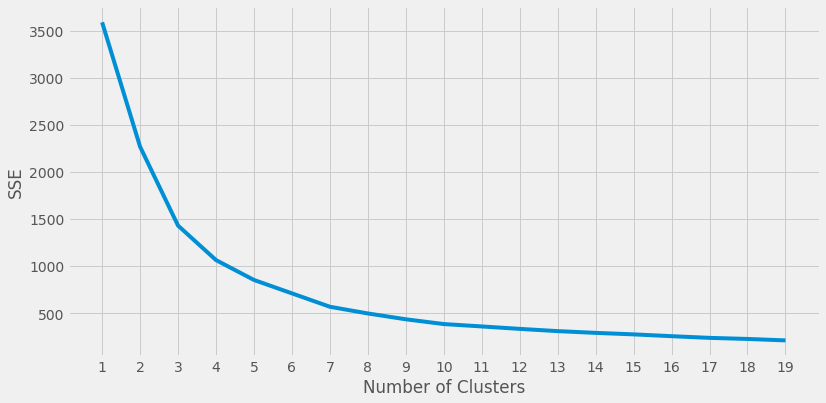

In [120]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 20), sse)
plt.xticks(range(1, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [121]:
kl = KneeLocator(range(1, 20), sse, curve="convex", direction="decreasing")
print("Optimal k-value is:",kl.elbow)

Optimal k-value is: 5


In [122]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(principalDf)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

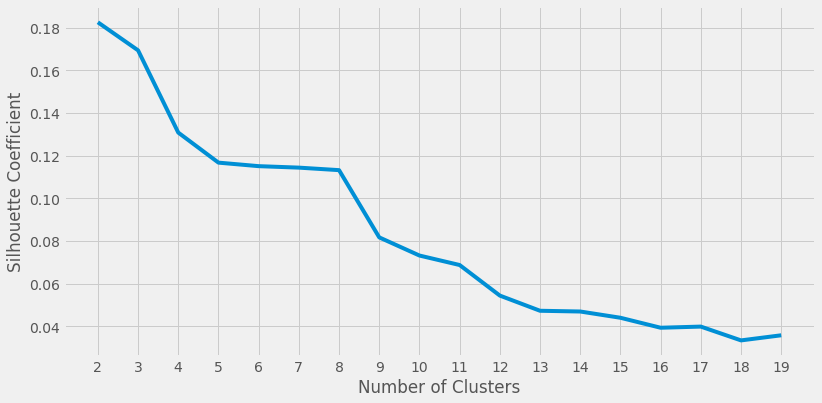

In [123]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 20), silhouette_coefficients)
plt.xticks(range(2, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [124]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(principalDf)
y_kmeans = kmeans.predict(principalDf)

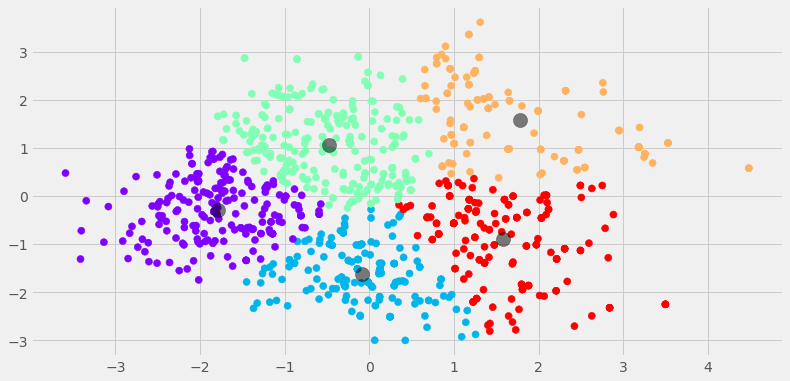

In [125]:
plt.scatter(principalDf['PC1'], principalDf['PC2'], c=y_kmeans, s=50, cmap='rainbow')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
pass;

In [126]:
from sklearn.metrics import silhouette_score 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

score_kemans_s = silhouette_score(principalDf, kmeans.labels_, metric='euclidean')
score_kemans_c = calinski_harabasz_score(principalDf, kmeans.labels_)
score_kemans_d = davies_bouldin_score(principalDf, kmeans.fit_predict(principalDf))
print('Silhouette Score: %.4f' % score_kemans_s)
print('Calinski Harabasz Score: %.4f' % score_kemans_c)
print('Davies Bouldin Score: %.4f' % score_kemans_d)

Silhouette Score: 0.3687
Calinski Harabasz Score: 735.6671
Davies Bouldin Score: 0.8846


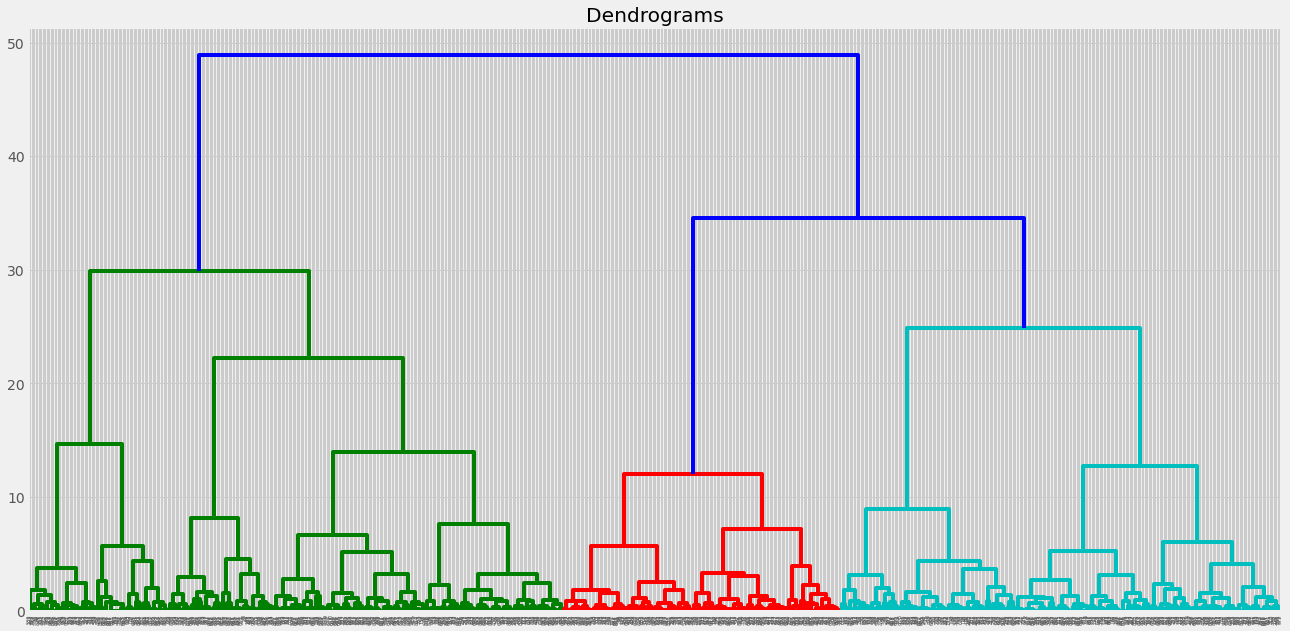

In [127]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(20, 10))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(principalDf, method='ward'))

0.41751995212182297


<Figure size 360x360 with 0 Axes>

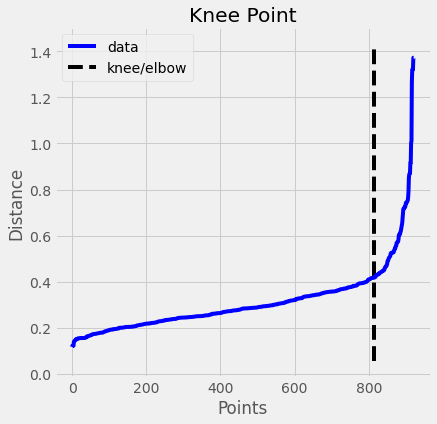

In [128]:
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=20)
neighbors = nearest_neighbors.fit(principalDf)
distances, indices = neighbors.kneighbors(principalDf)
distances = np.sort(distances[:,10], axis=0)

from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
pass;
print(distances[knee.knee])
pass;

Optimal number of min_samples based on silhouette score: [6, 7]


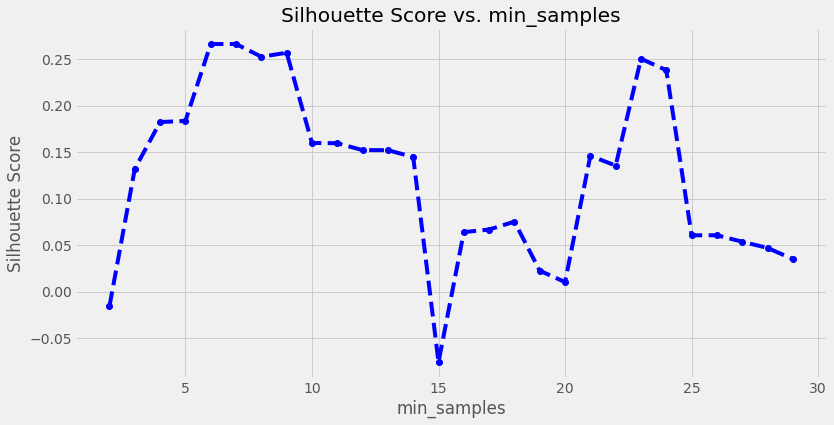

In [129]:
from sklearn.metrics import silhouette_score 
from sklearn.cluster import DBSCAN

def get_dbscan_score(data, center):
    
    dbscan = DBSCAN(eps=distances[knee.knee], min_samples=center)

    # Then fit the model to your data using the fit method
    model = dbscan.fit(principalDf)
    
    # Calculate Silhoutte Score

    score = silhouette_score(principalDf, model.labels_, metric='euclidean')
    
    return score

scores = []
centers = list(range(2,30))

for center in centers:
    scores.append(get_dbscan_score(principalDf, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('min_samples');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score vs. min_samples');

df3 = pd.DataFrame(centers,columns=['min_samples'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of min_samples based on silhouette score:', df4['min_samples'].tolist())

Optimal number of min_sample based on Calinski Harabasz score: [23]


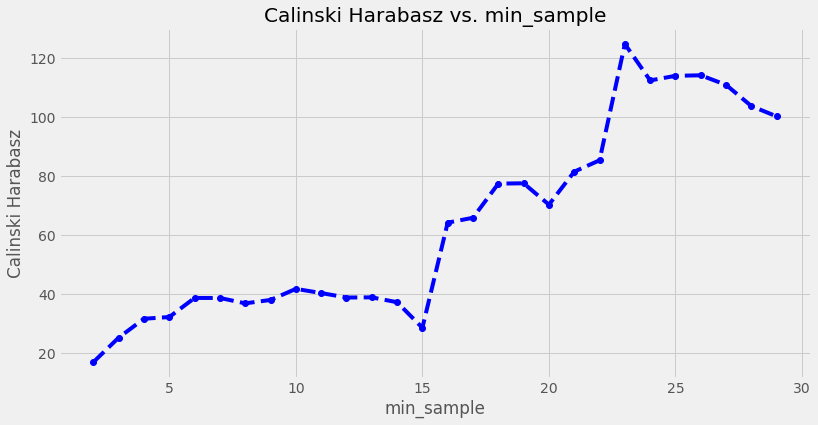

In [130]:
from sklearn.metrics import calinski_harabasz_score  

def get_dbscan_score(data, center):
    
    dbscan = DBSCAN(eps= distances[knee.knee], min_samples=center)

    # Then fit the model to your data using the fit method
    model = dbscan.fit(principalDf)
    
    # Calculate Silhoutte Score

    score = calinski_harabasz_score(principalDf, dbscan.labels_)
    
    return score

scores = []
centers = list(range(2,30))

for center in centers:
    scores.append(get_dbscan_score(principalDf, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('min_sample');
plt.ylabel('Calinski Harabasz');
plt.title('Calinski Harabasz vs. min_sample');

df3 = pd.DataFrame(centers,columns=['min_sample'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of min_sample based on Calinski Harabasz score:', df4['min_sample'].tolist())

Optimal number of min_samples based on DB score: [2]


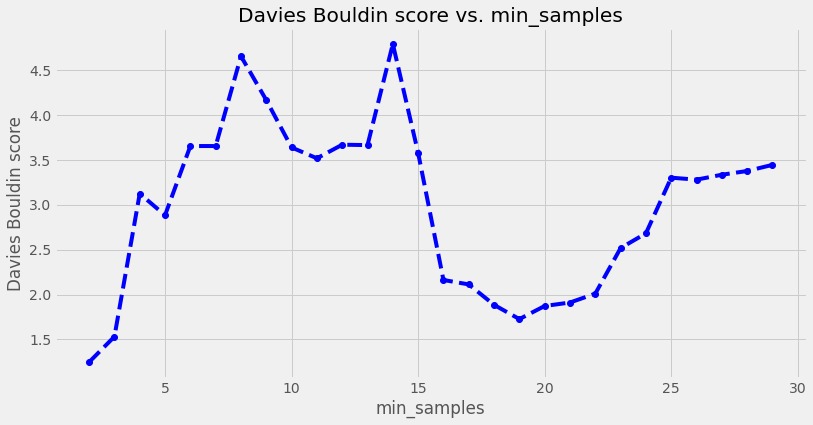

In [131]:
from sklearn.metrics import davies_bouldin_score 

def get_dbscan_score(data, center):
    dbscan = DBSCAN(eps= distances[knee.knee], min_samples=center)

    # Then fit the model to your data using the fit method
    model = dbscan.fit_predict(principalDf)
    
    # Calculate Silhoutte Score

    score = davies_bouldin_score(principalDf, model)
    
    return score

scores = []
centers = list(range(2,30))

for center in centers:
    scores.append(get_dbscan_score(principalDf, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('min_samples');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. min_samples');


df3 = pd.DataFrame(centers,columns=['min_samples'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.min()]
print('Optimal number of min_samples based on DB score:', df4['min_samples'].tolist())

In [139]:
from numpy import unique
from numpy import where
from sklearn.cluster import DBSCAN
from matplotlib import pyplot
# define dataset
# define the model
model = DBSCAN(eps=distances[knee.knee], min_samples= 6)
# rule of thumb for min_samples: 2*len(cluster_df.columns)
# fit model and predict clusters
yhat = model.fit_predict(principalDf)
# retrieve unique clusters
clusters = unique(yhat)
# Calculate cluster validation metrics
score_dbsacn_s = silhouette_score(principalDf, yhat, metric='euclidean')
score_dbsacn_c = calinski_harabasz_score(principalDf, yhat)
score_dbsacn_d = davies_bouldin_score(principalDf, yhat)
print('Silhouette Score: %.4f' % score_dbsacn_s)
print('Calinski Harabasz Score: %.4f' % score_dbsacn_c)
print('Davies Bouldin Score: %.4f' % score_dbsacn_d)

Silhouette Score: 0.2666
Calinski Harabasz Score: 38.7070
Davies Bouldin Score: 3.6553


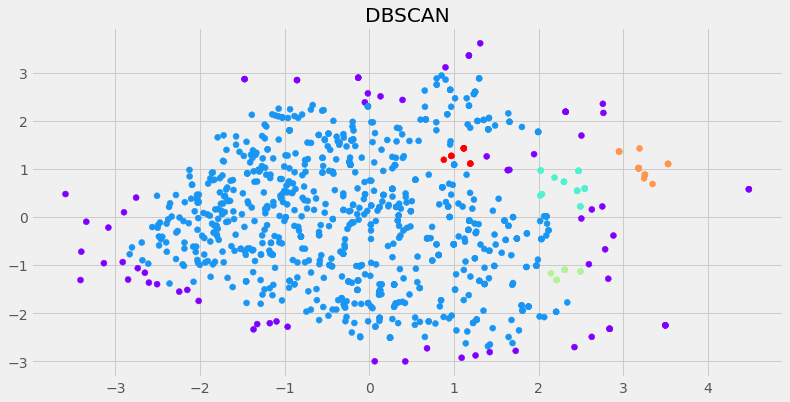

In [141]:
def dbscan():
    db = DBSCAN(eps=distances[knee.knee], min_samples=15)
    db.fit(principalDf)
    y_pred = db.fit_predict(principalDf)
    plt.scatter(principalDf['PC1'], principalDf['PC2'], c=y_pred, cmap='rainbow')
    plt.title("DBSCAN")
    pass;

dbscan()